In [ ]:
# importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# carregar o dataset
df = pd.read_excel(r"DadosPCA1.xlsx")

In [ ]:
df.head()

,Data,IPCA,Salário Mínimo Real,Rendimento Médio,Gini
0,1994-07-01,6.840159,406.864718,341.21,0.602472
1,1994-08-01,1.860404,491.296966,363.88,0.602472
2,1994-09-01,1.529524,523.475237,374.09,0.602472
3,1994-10-01,2.620244,509.118422,371.02,0.602472
4,1994-11-01,2.809497,494.480343,405.66,0.602472


In [ ]:
df.shape

(361, 5)

In [ ]:
# ajustando o formato da data
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')

In [ ]:
# Selecionando as colunas numéricas
features = ['IPCA', 'Salário Mínimo Real', 'Rendimento Médio', 'Gini']
x = df[features]

In [ ]:
# padronizando os dados
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
# aplicando o PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_scaled)

In [ ]:
# criando um DataFrame com os componentes principais
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [ ]:
# adicionando a coluna de data
df_pca['Data'] = df['Data']

In [ ]:
df_pca.head()

,PC1,PC2,Data
0,-5.253710,9.520577,1994-07-01
1,-3.142358,1.453402,1994-08-01
2,-2.945422,0.928039,1994-09-01
3,-3.398670,2.696774,1994-10-01
4,-3.475431,3.007099,1994-11-01


In [ ]:
# variância
explained_variance = pca.explained_variance_ratio_
print("Variância explicada por PC1 e PC2:", explained_variance)
print("Variância explicada total:", sum(explained_variance))

Variância explicada por PC1 e PC2: [0.73947299 0.22265687]
Variância explicada total: 0.9621298625563155


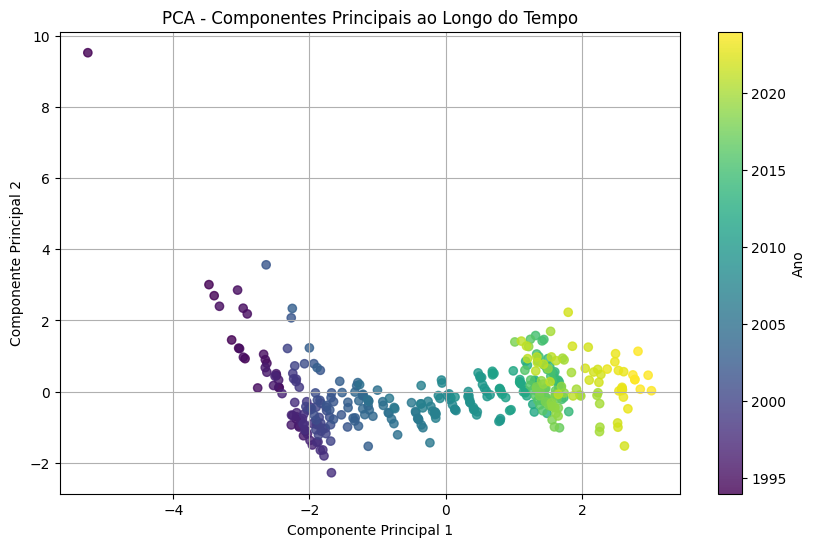

In [ ]:
# criando gráfico

df_pca['Ano'] = df['Data'].dt.year
df_pca['Timestamp'] = df['Data'].map(lambda x: x.timestamp())

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'],
                      c=df_pca['Ano'],  # Ou 'Timestamp'
                      cmap='viridis', alpha=0.8)
plt.colorbar(scatter, label='Ano')  # Ajustar o rótulo conforme a escala
plt.title('PCA - Componentes Principais ao Longo do Tempo')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

In [ ]:
#interpretando as componentes
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)
print(loadings)

                          PC1       PC2
IPCA                -0.232065  0.971499
Salário Mínimo Real  0.572667  0.100023
Rendimento Médio     0.553651  0.165463
Gini                -0.558273 -0.137141


In [ ]:
# localizando o outlier
outlier_index = df_pca[(df_pca['PC1'] < 5) & (df_pca['PC2'] > 8)].index
print(df.iloc[outlier_index])

        Data      IPCA  Salário Mínimo Real  Rendimento Médio      Gini
0 1994-07-01  6.840159           406.864718            341.21  0.602472


In [ ]:
# criando a matriz de covariância
matriz_cov = pd.DataFrame(x_scaled, columns=['IPCA', 'Salário Mínimo Real', 'Rendimento Médio', 'Gini']).cov()

print("Matriz de Covariância:")
print(matriz_cov)

Matriz de Covariância:
                         IPCA  Salário Mínimo Real  Rendimento Médio      Gini
IPCA                 1.002778            -0.306146         -0.240088  0.263984
Salário Mínimo Real -0.306146             1.002778          0.940597 -0.953883
Rendimento Médio    -0.240088             0.940597          1.002778 -0.882425
Gini                 0.263984            -0.953883         -0.882425  1.002778


In [ ]:
# identificando os autovalores e autovetores
autovalores, autovetores = np.linalg.eig(matriz_cov)

# Exibir autovalores
print("Autovalores:")
print(autovalores)

# Exibir autovetores
print("\nAutovetores:")
print(autovetores)

Autovalores:
[2.96610833 0.89310145 0.03135162 0.12054971]

Autovetores:
[[ 0.23206488 -0.97149873 -0.04219935 -0.02356526]
 [-0.57266736 -0.10002319 -0.81119735 -0.06329546]
 [-0.55365083 -0.16546266  0.35386945  0.73543815]
 [ 0.558273    0.1371411  -0.46363184  0.67421739]]
